# Digital Marketing Final 

## init

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.ExcelFile("CompleteData.xlsm")
df.sheet_names

['Conversion Rate Raw',
 'Social - Medium Raw',
 'Social - Medium - Pivot',
 'SMAU',
 'SMID',
 'Channels - Pivot',
 'CAU',
 'CID',
 'Channel Raw']

In [534]:
Conversion_Rate_Raw = df.parse("Conversion Rate Raw")
Social_Medium_Raw = df.parse("Social - Medium Raw")
Social_Medium_Pivot_AU = df.parse("SMAU")
Social_Medium_Pivot_ID = df.parse("SMID")
Channels_Pivot_AU = df.parse("CAU")
Channels_Pivot_ID = df.parse("CID")
Channel_Raw = df.parse("Channel Raw")
Channel_Raw

,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,ID,Social,202106,48553,33324,72044,0.512506,3.868802,143.288865,0.002374,171,109475621
1,ID,Social,202107,14072,7550,23714,0.488150,4.402758,159.286202,0.004512,107,60522955
2,ID,Social,202108,125026,102289,146136,0.617165,3.188845,91.853931,0.002347,343,221458620
3,ID,Social,202109,284006,240588,351023,0.733502,2.609883,75.083402,0.002288,803,450904460
4,ID,Social,202110,859964,804860,1103039,0.845034,1.324728,45.983834,0.000028,31,33086100
...,...,...,...,...,...,...,...,...,...,...,...,...
212,AU,(Other),202201,6909,5557,9062,0.511300,3.260000,0.001181,0.0277,251,"A$36,275.57"
213,AU,(Other),202202,4466,3313,6266,0.386200,3.950000,0.001562,0.0354,222,"A$34,482.48"
214,AU,(Other),202203,20019,16952,28607,0.373000,4.000000,0.001551,0.0305,872,"A$132,336.27"
215,AU,(Other),202204,15390,12474,21372,0.460900,3.930000,0.001609,0.0392,837,"A$130,581.50"


# Cleaning

In [535]:
import datetime
Conversion_Rate_Raw["Month of Year1"] = Conversion_Rate_Raw["Month of Year"].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
Conversion_Rate_Raw_ID = Conversion_Rate_Raw.loc[Conversion_Rate_Raw["Country"]=="ID"]
Conversion_Rate_Raw_AU = Conversion_Rate_Raw.loc[Conversion_Rate_Raw["Country"]=="AU"]
Conversion_Rate_Raw_ID = Conversion_Rate_Raw_ID.sort_values(by="Month of Year1")
Conversion_Rate_Raw_AU = Conversion_Rate_Raw_AU.sort_values(by="Month of Year1")
Conversion_Rate_Raw_ID["Ecommerce Conversion Rate"] = Conversion_Rate_Raw_ID["Ecommerce Conversion Rate"] *100
Conversion_Rate_Raw_AU["Ecommerce Conversion Rate"] = Conversion_Rate_Raw_AU["Ecommerce Conversion Rate"] *100
print(Conversion_Rate_Raw_ID.shape)
Conversion_Rate_Raw_ID.head(2)

(12, 8)


,Country,Month of Year,Users,Sessions,Transactions,Ecommerce Conversion Rate,Transactions per User,Month of Year1
15,ID,202106,792284,990507,995,0.1,0.0013,2021-06-01
23,ID,202107,275316,389219,773,0.2,0.0028,2021-07-01


In [536]:
Social_Medium_Raw["Revenue1"] = Social_Medium_Raw["Revenue"].apply(lambda x: '{:.2f}'.format(float(x[2:].replace(",", ""))).rstrip("0") if type(x) == str else x)
Social_Medium_Raw["Month of Year1"] = Social_Medium_Raw["Month of Year"].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
Social_Medium_Raw_ID = Social_Medium_Raw.loc[Social_Medium_Raw["Country"]=="ID"]
Social_Medium_Raw_AU = Social_Medium_Raw.loc[Social_Medium_Raw["Country"]=="AU"]
Social_Medium_Raw_ID = Social_Medium_Raw_ID.sort_values(by="Month of Year1")
Social_Medium_Raw_AU = Social_Medium_Raw_AU.sort_values(by="Month of Year1")
print(Social_Medium_Raw_AU.shape)
Social_Medium_Raw_AU.head(2)

(148, 14)


,Country,Source,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
298,AU,YouTube,202106,140,136,153,0.7778,1.60,0.000718,0,0,A$0.00,0.,2021-06-01
299,AU,Instagram,202106,134,86,150,0.6467,2.35,0.000590,0,0,A$0.00,0.,2021-06-01


In [537]:
Channel_Raw["Revenue1"] = Channel_Raw["Revenue"].apply(lambda x: '{:.2f}'.format(float(x[2:].replace(",", ""))).rstrip("0") if type(x) == str else x)
Channel_Raw["Month of Year1"] = Channel_Raw["Month of Year"].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
Channel_Raw_ID = Channel_Raw.loc[Channel_Raw["Country"]=="ID"]
Channel_Raw_AU = Channel_Raw.loc[Channel_Raw["Country"]=="AU"]
Channel_Raw_AU = Channel_Raw_AU.sort_values(by="Month of Year1")
Channel_Raw_ID = Channel_Raw_ID.sort_values(by="Month of Year1")
print(Channel_Raw_ID.shape)
Channel_Raw_ID.head(2)

(129, 14)


,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
0,ID,Social,202106,48553,33324,72044,0.512506,3.868802,143.288865,0.002374,171,109475621,109475621,2021-06-01
68,ID,NewsLetter,202106,10821,6857,22141,0.528838,4.213044,166.371934,0.006639,147,130753452.5,130753452.5,2021-06-01


In [538]:
print(Social_Medium_Pivot_AU.head(2),"\n")
print(Social_Medium_Pivot_ID.head(2))

     Source  Sum of Sessions  Sum of Transactions
0  Facebook           416054                 1228
1    TikTok           109994                   10 

     Source  Sum of Sessions  Sum of Transactions
0  Facebook          2670730                  448
1  whatsapp           472217                 1782


In [539]:
print(Channels_Pivot_AU.head(2),"\n")
print(Channels_Pivot_ID.head(2))

  Saras  Channel Groupping  Sum of Sessions  Sum of Transactions
0              Paid Search          1153284                19846
1           Organic Search          1080631                 9369 

  Saras  Channel Groupping  Sum of Sessions  Sum of Transactions
0                  Display          4262422                 1030
1                   Social          3745847                 2639


# Feature Engineering

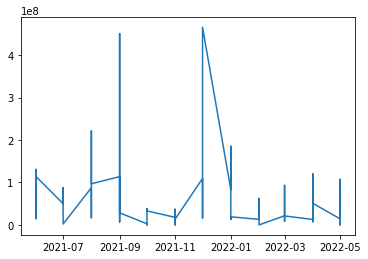

In [540]:
plt.plot(Channel_Raw_ID["Month of Year1"][:], Channel_Raw_ID["Revenue1"][:])

Text(0.5, 0, 'Source')

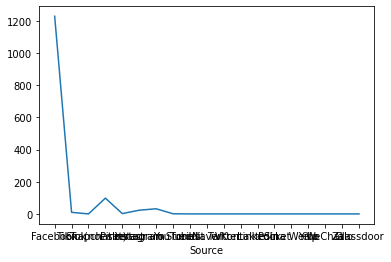

In [541]:
plt.plot(Social_Medium_Pivot_AU["Source"], Social_Medium_Pivot_AU["Sum of Transactions"])
plt.xlabel("Source")

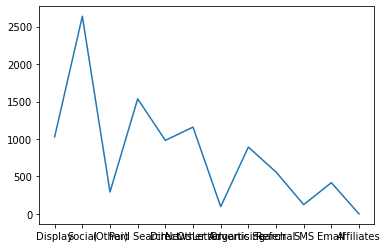

In [542]:
plt.plot(Channels_Pivot_ID["Saras  Channel Groupping"], Channels_Pivot_ID["Sum of Transactions"])


Index(['Country', 'Month of Year', 'Users', 'Sessions', 'Transactions',
       'Ecommerce Conversion Rate', 'Transactions per User', 'Month of Year1'],
      dtype='object')

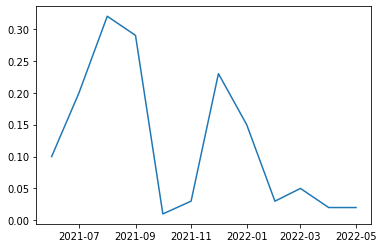

In [543]:
plt.plot(Conversion_Rate_Raw_ID["Month of Year1"][:], Conversion_Rate_Raw_ID["Ecommerce Conversion Rate"][:])
Conversion_Rate_Raw.columns

In [544]:
Channel_Raw_AU = Channel_Raw_AU.drop("Revenue", axis=1)
Channel_Raw_AU["Revenue1"] = Channel_Raw_AU["Revenue1"].apply(lambda x: float(x))

In [545]:
Channel_Raw_AU.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 129 to 216
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Country                    88 non-null     object        
 1   Saras  Channel Groupping   88 non-null     object        
 2   Month of Year              88 non-null     int64         
 3   Users                      88 non-null     int64         
 4   New Users                  88 non-null     int64         
 5   Sessions                   88 non-null     int64         
 6   Bounce Rate                88 non-null     float64       
 7   Pages / Session            88 non-null     float64       
 8   Avg. Session Duration      88 non-null     float64       
 9   Ecommerce Conversion Rate  88 non-null     object        
 10  Transactions               88 non-null     int64         
 11  Revenue1                   88 non-null     float64       
 12  Month o

In [547]:
df2

Saras Channel Groupping,(Other),Affiliates,Direct,Display,Email,Organic Search,Paid Search,Referral,Social
Month of Year1,,,,,,,,,
2021-06-01,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
2021-07-01,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
2021-08-01,2946.66,0.0,3288.60,0.0,0.0,4570.97,6590.95,1281.42,239.90
2021-09-01,329539.34,0.0,211101.67,0.0,0.0,249633.98,504681.54,55610.36,77695.78
2021-10-01,88748.15,0.0,107491.39,0.0,0.0,150195.87,330425.53,29407.12,28684.26
2021-11-01,207570.98,0.0,145910.18,0.0,0.0,190823.55,386659.90,26059.40,27446.12
2021-12-01,116610.87,0.0,116662.69,0.0,0.0,130693.88,316673.12,21265.31,7016.55
2022-01-01,36275.57,0.0,47165.15,0.0,0.0,61113.04,157367.76,13502.19,1505.95
2022-02-01,34482.48,0.0,39238.83,0.0,0.0,62781.45,144582.45,10074.58,2667.07


# Indonesia

In [548]:
from matplotlib import cm
color = cm.tab20(np.linspace(.1, 1, 12))

df2 = Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Revenue1'].sum().unstack().fillna(0)
df2["sum"] = df2["(Other)"] + df2["Affiliates"] + df2["Direct"] + df2["Display"] + df2["Email"] + df2["NewsLetter"] + df2["Organic Search"] +\
                                     df2["Other Advertising"] + df2["Paid Search"] + df2["Referral"] + df2["SMS"] + df2["Social"]
for col in df2:  df2[col] = df2[col]/ df2["sum"]

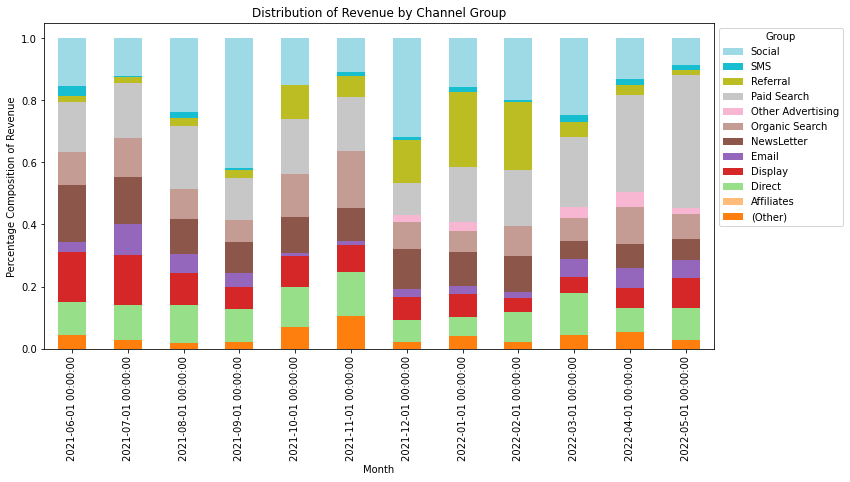

In [549]:
df2 = df2.drop("sum", axis=1)
dif2 = df2.plot(kind='bar', stacked=True, figsize=(12,6), color = color, legend="reverse",
         ylabel="Percentage Composition of Revenue", xlabel="Month", title="Distribution of Revenue by Channel Group")
handles, labels = dif3.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Group', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [508]:
df3 = Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Users'].sum().unstack().fillna(0)
df3["sum"] = df3["(Other)"] + df3["Affiliates"] + df3["Direct"] + df3["Display"] + df3["Email"] + df3["NewsLetter"] + df3["Organic Search"] +\
                                     df3["Other Advertising"] + df3["Paid Search"] + df3["Referral"] + df3["SMS"] + df3["Social"]
for col in df3:  df3[col] = df3[col]/ df3["sum"]

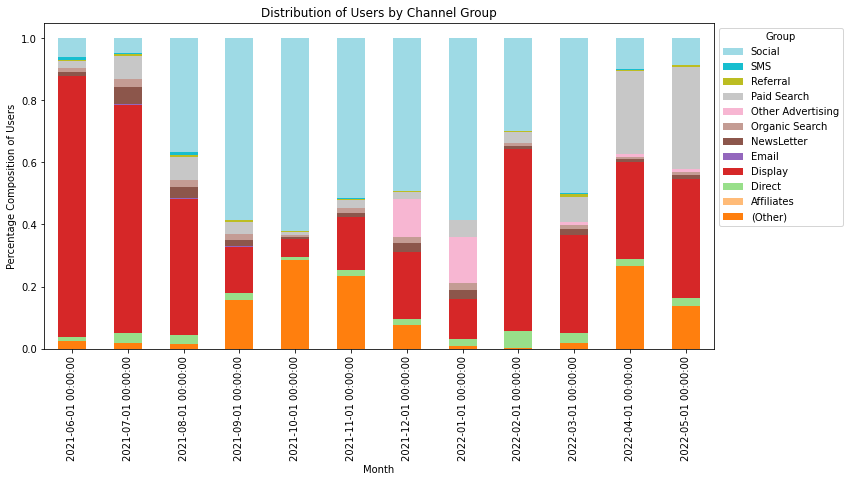

In [509]:
df3 = df3.drop("sum", axis=1)
dif3 = df3.plot(kind='bar', stacked=True, figsize=(12,6), color = color, legend="reverse",
         ylabel="Percentage Composition of Users", xlabel="Month", title="Distribution of Users by Channel Group")
handles, labels = dif3.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Group', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [488]:
# fig, ax = plt.subplots()
# color = cm.tab20(np.linspace(.1, 1, 13))
# df4 = Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Transactions'].sum().unstack().fillna(0) / \
#         Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions'].sum().unstack().fillna(0) *100
# df9 = Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Transactions'].sum()/         Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions'].sum() *100
# df10 = pd.DataFrame(df9, columns = ["Ecommerce Conversion Rate"]).reset_index()
# # df10 = df10.groupby('Month of Year1')['Ecommerce Conversion Rate']
# df4_1 = Conversion_Rate_Raw_ID.groupby('Month of Year1')['Ecommerce Conversion Rate'].mean().fillna(0)
# # df4_2 = (df4["(Other)"] + df4["Affiliates"] + df4["Direct"] + df4["Display"] + df4["Email"] + df4["NewsLetter"] + df4["Organic Search"] +\
# #                                      df4["Other Advertising"] + df4["Paid Search"] + df4["Referral"] + df4["SMS"] + df4["Social"])/(len(df4.columns))
# # df4["Conversion_Rate_Raw"] = Conversion_Rate_Raw_ID.groupby('Month of Year1')['Ecommerce Conversion Rate'].mean().fillna(0)
# df4_1.plot(kind='line', stacked=True, figsize=(12,6), color = "blue", ax = ax, use_index=True, secondary_y=False)
# # df10.plot(kind='line', stacked=True, figsize=(12,6), color = "blue", ax = ax, use_index=True, secondary_y=False)
# df4.plot(kind='line', stacked=True, figsize=(12,6), color = color, ax=ax, use_index=True, 
#          ylabel="Ecommerce Conversion Rate", xlabel="Month", title="Average Ecommerce Conversion Rate by Channel Group")
# # df4_2.plot(kind='line', stacked=True, figsize=(12,6), color = "red", ax = ax, use_index=True, secondary_y=False)
# handles, labels = ax.get_legend_handles_labels()
# # plt.legend(handles[::-1], labels[::-1], title='Line')
# plt.show()

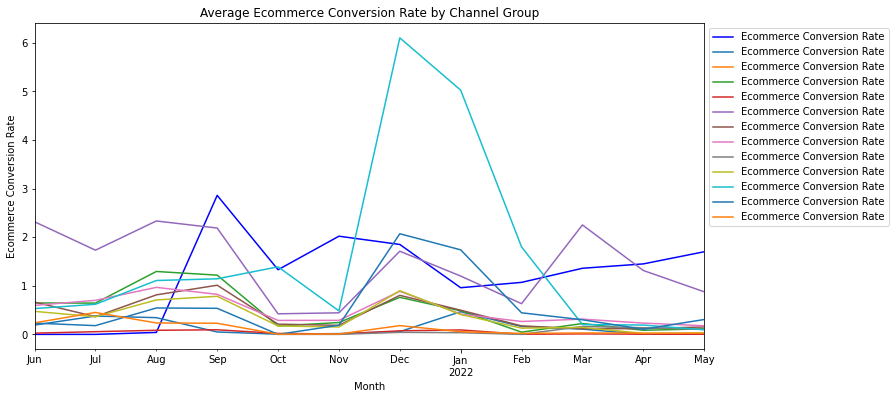

In [576]:
fig, ax = plt.subplots()

df9 = Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Transactions'].sum() / Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions'].sum() *100
df10 = pd.DataFrame(df9, columns = ["Ecommerce Conversion Rate"]).reset_index()
# df10 = df10.groupby('Month of Year1')['Ecommerce Conversion Rate']

df4_1.plot(kind='line', stacked=True, figsize=(12,6), color = "blue", ax = ax, use_index=True, secondary_y=False)
df10.groupby("Saras  Channel Groupping").plot(x="Month of Year1", y="Ecommerce Conversion Rate", ax=ax, figsize=(12,6),stacked=True,
                                             ylabel="Ecommerce Conversion Rate", xlabel="Month", title="Average Ecommerce Conversion Rate by Channel Group")
plt.legend( bbox_to_anchor=(1.0, 1.0))

In [628]:
def substitute_pattern(df, column, pattern, new_string):
    df.at[df[column].str.contains(pattern, case=False, na=False, regex=True), column] = new_string
    return

substituions = [(r"facebook", "Facebook"), (r"instagram", "Instagram"), (r"tiktok", "Tiktok"),
                (r"^google$", "Google")]

for pattern, new_string in substituions:
    substitute_pattern(Social_Medium_Raw_ID, "Source", pattern, new_string)

Social_Medium_Raw_ID["One Time Sessions"] =  Social_Medium_Raw_ID["Bounce Rate"] * Social_Medium_Raw_ID["Sessions"]
df11 = Social_Medium_Raw_ID.groupby("Source")[["One Time Sessions", "Sessions"]].sum()
df11["Bounce Rate"] = df11["One Time Sessions"]/df11["Sessions"]
# df11 = df11[df]
df11[df11["Sessions"] >100].sort_values("Bounce Rate", ascending=False)

,One Time Sessions,Sessions,Bounce Rate
Source,,,
Facebook,2414748.0,2754138,0.876771
Tiktok,314334.0,443455,0.708830
youtube.com,557.0,847,0.657615
whatsapp,253701.0,472217,0.537255
t.co,85.0,181,0.469613
Instagram,22989.0,60760,0.378357
IGShopping,4941.0,14162,0.348891


In [652]:
Channel_Raw_ID.columns

Index(['Country', 'Saras  Channel Groupping', 'Month of Year', 'Users',
       'New Users', 'Sessions', 'Bounce Rate', 'Pages / Session',
       'Avg. Session Duration', 'Ecommerce Conversion Rate', 'Transactions',
       'Revenue', 'Revenue1', 'Month of Year1', 'Current Conversion Rate'],
      dtype='object')

In [673]:
Channel_Raw_ID["Current Conversion Rate"] =  Channel_Raw_ID["Transactions"] / Channel_Raw_ID["Sessions"]
df7 = Channel_Raw_ID.groupby("Saras  Channel Groupping")[["Current Conversion Rate", "Sessions", "Transactions"]].mean()
df7["Revenue"] = Channel_Raw_ID.groupby("Saras  Channel Groupping")["Revenue"].mean()
df7["Avg Revenue"] = df7["Revenue"] / df7["Transactions"]
df7["Proj Revenue"] = 0.03 * df7["Sessions"] * df7["Avg Revenue"]
df7["Growth Rate"] = df7["Proj Revenue"] / df7["Avg Revenue"] 
# df11 = df11[df]
df7[["Current Conversion Rate", "Revenue", "Proj Revenue", "Growth Rate"]].sort_values("Growth Rate", ascending=False)

,Current Conversion Rate,Revenue,Proj Revenue,Growth Rate
Saras Channel Groupping,,,,
Display,0.000392,5.440019e+07,6.753686e+09,10656.05500
Social,0.001245,1.422698e+08,6.058216e+09,9364.61750
(Other),0.001487,1.948975e+07,2.883735e+09,3612.73000
Paid Search,0.003570,1.053734e+08,2.236720e+09,2717.00500
Other Advertising,0.000598,1.122859e+07,6.691696e+08,722.59125
Direct,0.004942,5.880048e+07,4.588647e+08,638.60750
NewsLetter,0.004260,6.988425e+07,4.490965e+08,620.67250
Organic Search,0.004964,5.612292e+07,3.221280e+08,426.65000
Referral,0.015573,5.028569e+07,1.190125e+08,110.25000


In [674]:
df7["Diff"] = df7["Proj Revenue"] - df7["Avg Revenue"] 
df7["TDiff"] = 0.03 * df7["Sessions"] - df7["Transactions"]
print("total profit growth: ", df7["Diff"].sum())
print("avg growth rate: ", df7["Growth Rate"].mean())
print("total transaction growth: ", df7["TDiff"].sum())

total profit growth:  20063439832.161827
avg growth rate:  2638.456477272727
total transaction growth:  28208.34291666667


In [667]:
df7

,Current Conversion Rate,Sessions,Transactions,Revenue1,Avg Revenue,Proj Revenue,Growth Rate,Diff
Saras Channel Groupping,,,,,,,,
(Other),0.027316,25236.916667,771.750000,104122.548333,134.917458,102147.019452,757.1075,102012.101994
Affiliates,0.000000,1.875000,0.000000,0.000000,NaN,NaN,NaN,NaN
Direct,0.012017,46134.333333,566.916667,84024.657500,148.213419,205131.818409,1384.0300,204983.604990
Display,0.000000,125.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
Email,0.000000,60.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
Organic Search,0.008863,90052.583333,780.750000,115740.784167,148.243079,400490.167579,2701.5775,400341.924499
Paid Search,0.015903,96107.000000,1653.833333,233402.567500,141.128228,406902.317832,2883.2100,406761.189604
Referral,0.025927,4962.833333,136.250000,20231.848333,148.490630,22108.027443,148.8850,21959.536813
Social,0.002133,49497.833333,116.166667,14189.817500,122.150509,181385.566566,1484.9350,181263.416056


# Australia

In [607]:
from matplotlib import cm
color = cm.tab20(np.linspace(.1, 1, 9))

df2 = Channel_Raw_AU.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Revenue1'].sum().unstack().fillna(0)
df2["sum"] = df2["(Other)"] + df2["Affiliates"] + df2["Direct"] + df2["Display"] + df2["Email"] + df2["Organic Search"] +\
                                     + df2["Paid Search"] + df2["Referral"] + df2["Social"]
for col in df2:  df2[col] = df2[col]/ df2["sum"]

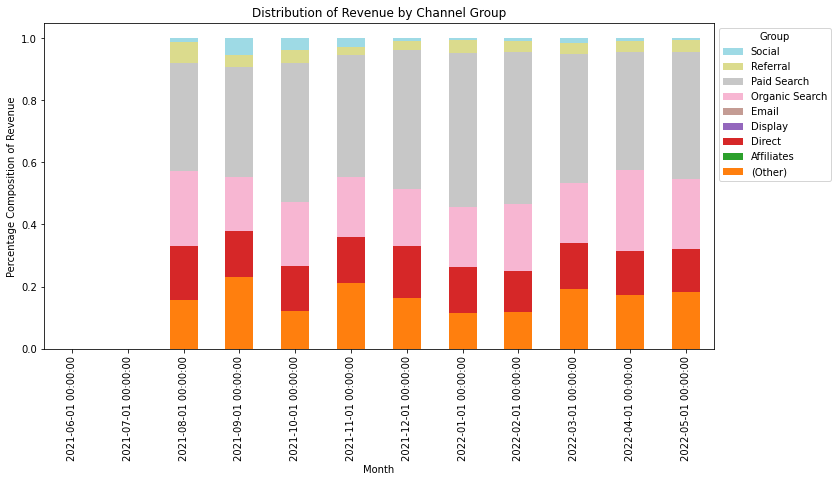

In [608]:
df2 = df2.drop("sum", axis=1)
dif2 = df2.plot(kind='bar', stacked=True, figsize=(12,6), color = color, legend="reverse",
         ylabel="Percentage Composition of Revenue", xlabel="Month", title="Distribution of Revenue by Channel Group")
handles, labels = dif3.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Group', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [570]:
df3 = Channel_Raw_AU.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Users'].sum().unstack().fillna(0)
df3["sum"] = df3["(Other)"] + df3["Affiliates"] + df3["Direct"] + df3["Display"] + df3["Email"] + df3["Organic Search"] +\
                                     + df3["Paid Search"] + df3["Referral"] + df3["Social"]
for col in df3:  df3[col] = df3[col]/ df3["sum"]

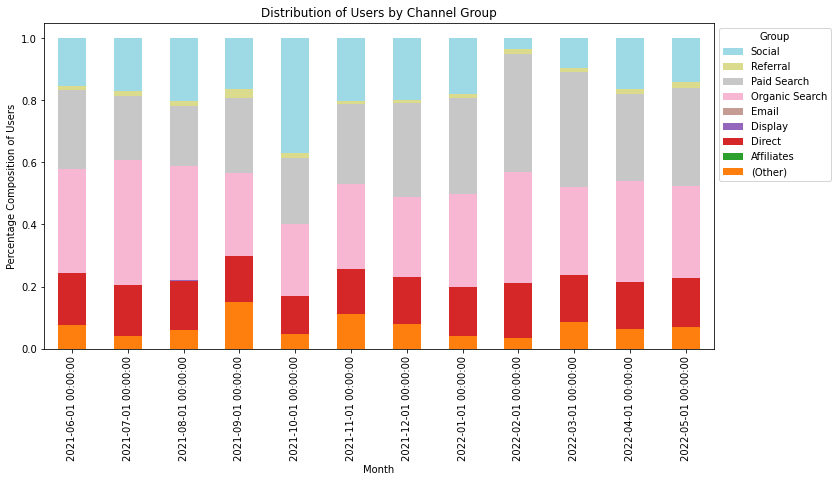

In [571]:
df3 = df3.drop("sum", axis=1)
dif3 = df3.plot(kind='bar', stacked=True, figsize=(12,6), color = color, legend="reverse",
         ylabel="Percentage Composition of Users", xlabel="Month", title="Distribution of Users by Channel Group")
handles, labels = dif3.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Group', bbox_to_anchor=(1.0, 1.0))
plt.show()

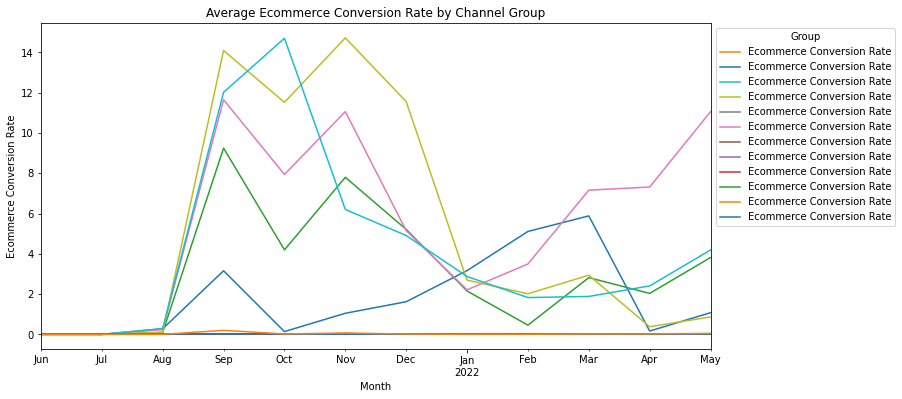

In [611]:
fig, ax = plt.subplots()

df9 = Channel_Raw_AU.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Transactions'].sum() / Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions'].sum() *100
df10 = pd.DataFrame(df9, columns = ["Ecommerce Conversion Rate"]).reset_index().fillna(0)
# df10 = df10.groupby('Month of Year1')['Ecommerce Conversion Rate']

# df4_1.plot(kind='line', stacked=True, figsize=(12,6), color = "blue", ax = ax, use_index=True, secondary_y=True)
df10.groupby("Saras  Channel Groupping").plot(x="Month of Year1", y="Ecommerce Conversion Rate", ax=ax, figsize=(12,6),stacked=True,
                                             ylabel="Ecommerce Conversion Rate", xlabel="Month", title="Average Ecommerce Conversion Rate by Channel Group")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Group',bbox_to_anchor=(1.0, 1.0))

In [631]:
Channel_Raw_AU

,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue1,Month of Year1
129,AU,Social,202106,39393,36169,53553,0.5794,2.53,0.000845,0,0,0.00,2021-06-01
153,AU,Paid Search,202106,65228,53954,99728,0.3932,3.98,0.001817,0,0,0.00,2021-06-01
205,AU,(Other),202106,19557,15488,29195,0.4700,3.46,0.001644,0,0,0.00,2021-06-01
185,AU,Direct,202106,42572,41810,57033,0.5333,3.37,0.001458,0,0,0.00,2021-06-01
177,AU,Email,202106,1,1,1,0.0000,10.00,0.001273,0,0,0.00,2021-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,AU,Referral,202205,5076,4124,6527,0.3073,4.35,0.001852,0.034,222,35036.46,2022-05-01
196,AU,Direct,202205,38820,37922,51914,0.4860,3.71,0.001505,0.0148,770,128050.96,2022-05-01
164,AU,Paid Search,202205,78359,67623,118537,0.4250,4.00,0.001620,0.0196,2328,382305.52,2022-05-01
140,AU,Social,202205,35031,33301,37234,0.7034,1.98,0.000382,0.001,38,5592.77,2022-05-01


In [670]:
Channel_Raw_AU["Current Conversion Rate"] =  Channel_Raw_AU["Transactions"] / Channel_Raw_AU["Sessions"]
df7 = Channel_Raw_AU.groupby("Saras  Channel Groupping")[["Current Conversion Rate", "Sessions", "Transactions", "Revenue1"]].mean()
df7["Avg Revenue"] = df7["Revenue1"] / df7["Transactions"]
df7["Proj Revenue"] = 0.03 * df7["Sessions"] * df7["Avg Revenue"]
df7["Growth Rate"] = df7["Proj Revenue"] / df7["Avg Revenue"] 
# df11 = df11[df]
df7[["Current Conversion Rate", "Revenue1", "Proj Revenue", "Growth Rate"]].sort_values("Growth Rate", ascending=False)

,Current Conversion Rate,Revenue1,Proj Revenue,Growth Rate
Saras Channel Groupping,,,,
Paid Search,0.015903,233402.567500,406902.317832,2883.2100
Organic Search,0.008863,115740.784167,400490.167579,2701.5775
Social,0.002133,14189.817500,181385.566566,1484.9350
Direct,0.012017,84024.657500,205131.818409,1384.0300
(Other),0.027316,104122.548333,102147.019452,757.1075
Referral,0.025927,20231.848333,22108.027443,148.8850
Affiliates,0.000000,0.000000,NaN,NaN
Display,0.000000,0.000000,NaN,NaN
Email,0.000000,0.000000,NaN,NaN


In [671]:
df7

,Current Conversion Rate,Sessions,Transactions,Revenue1,Avg Revenue,Proj Revenue,Growth Rate
Saras Channel Groupping,,,,,,,
(Other),0.027316,25236.916667,771.750000,104122.548333,134.917458,102147.019452,757.1075
Affiliates,0.000000,1.875000,0.000000,0.000000,NaN,NaN,NaN
Direct,0.012017,46134.333333,566.916667,84024.657500,148.213419,205131.818409,1384.0300
Display,0.000000,125.000000,0.000000,0.000000,NaN,NaN,NaN
Email,0.000000,60.000000,0.000000,0.000000,NaN,NaN,NaN
Organic Search,0.008863,90052.583333,780.750000,115740.784167,148.243079,400490.167579,2701.5775
Paid Search,0.015903,96107.000000,1653.833333,233402.567500,141.128228,406902.317832,2883.2100
Referral,0.025927,4962.833333,136.250000,20231.848333,148.490630,22108.027443,148.8850
Social,0.002133,49497.833333,116.166667,14189.817500,122.150509,181385.566566,1484.9350


In [672]:
df7["Diff"] = df7["Proj Revenue"] - df7["Avg Revenue"] 
df7["TDiff"] = 0.03 * df7["Sessions"] - df7["Transactions"]
print("total profit growth: ", df7["Diff"].sum())
print("avg growth rate: ", df7["Growth Rate"].mean())
print("total transaction growth: ", df7["TDiff"].sum())

total profit growth:  1317321.7739570867
avg growth rate:  1559.9575000000002
total transaction growth:  5339.684583333334


In [629]:
def substitute_pattern(df, column, pattern, new_string):
    df.at[df[column].str.contains(pattern, case=False, na=False, regex=True), column] = new_string
    return

substituions = [(r"facebook", "Facebook"), (r"instagram", "Instagram"), (r"tiktok", "Tiktok"),
                (r"^google$", "Google")]

for pattern, new_string in substituions:
    substitute_pattern(Social_Medium_Raw_AU, "Source", pattern, new_string)

Social_Medium_Raw_AU["One Time Sessions"] =  Social_Medium_Raw_AU["Bounce Rate"] * Social_Medium_Raw_AU["Sessions"]
df11 = Social_Medium_Raw_AU.groupby("Source")[["One Time Sessions", "Sessions"]].sum()
df11["Bounce Rate"] = df11["One Time Sessions"]/df11["Sessions"]
# df11 = df11[df]
df11[df11["Sessions"] >100].sort_values("Bounce Rate", ascending=False)

,One Time Sessions,Sessions,Bounce Rate
Source,,,
Snapchat,26480.3332,27290,0.970331
Tiktok,104925.0893,109994,0.953916
Pinterest,6229.9345,7585,0.821349
Naver,99.0014,132,0.750011
YouTube,545.9988,739,0.738835
reddit,351.9995,506,0.695651
Instagram,6246.9996,9038,0.691193
(not set),14785.1148,22526,0.656358
Facebook,254051.0502,416054,0.610620


# Comparison

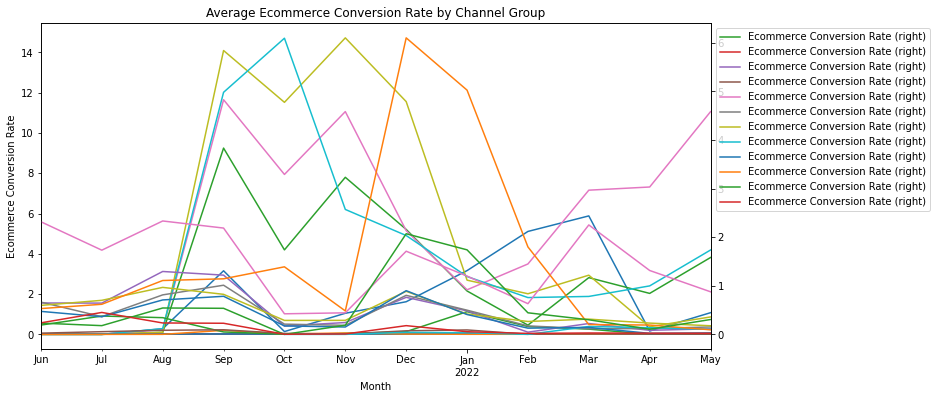

In [581]:
fig, ax = plt.subplots()

dfAU = Channel_Raw_AU.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Transactions'].sum() / Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions'].sum() *100
dfAU1 = pd.DataFrame(dfAU, columns = ["Ecommerce Conversion Rate"]).reset_index()
dfID = Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Transactions'].sum() / Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions'].sum() *100
dfID1 = pd.DataFrame(dfID, columns = ["Ecommerce Conversion Rate"]).reset_index()
# df10 = df10.groupby('Month of Year1')['Ecommerce Conversion Rate']

dfAU1.groupby("Saras  Channel Groupping").plot(x="Month of Year1", y="Ecommerce Conversion Rate", ax=ax, figsize=(12,6),stacked=True, legend=False,
                                             ylabel="Ecommerce Conversion Rate", xlabel="Month", title="Average Ecommerce Conversion Rate by Channel Group")


# df4_1.plot(kind='line', stacked=True, figsize=(12,6), color = "blue", ax = ax, use_index=True, secondary_y=True)
dfID1.groupby("Saras  Channel Groupping").plot(x="Month of Year1", y="Ecommerce Conversion Rate", ax=ax, figsize=(12,6),stacked=True, secondary_y=True, legend=False,
                                             ylabel="Ecommerce Conversion Rate", xlabel="Month", title="Average Ecommerce Conversion Rate by Channel Group")
plt.legend( bbox_to_anchor=(1.0, 1.0))

In [613]:
Social_Medium_Raw

,Country,Source,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
0,ID,Facebook,202110,595092,543200,692512,0.932780,1.122206,6.276703,0.000012,8,7818900,7818900,2021-10-01
1,ID,facebook,202201,290520,244816,328363,0.905001,1.344265,16.184107,0.000189,62,29979510,29979510,2022-01-01
2,ID,TikTok,202110,237806,236237,378202,0.685491,1.680999,120.502575,0,0,0,0,2021-10-01
3,ID,Facebook,202111,237020,198477,280335,0.929181,1.157315,7.306473,0.000011,3,2159600,2159600,2021-11-01
4,ID,facebook,202203,229586,180824,269469,0.931591,1.117787,7.392962,0.000026,7,7149000,7149000,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,AU,VKontakte,202204,1,1,1,0.000000,2.000000,0.000185,0,0,A$0.00,0.,2022-04-01
391,AU,Yelp,202111,1,1,1,0.000000,2.000000,0.001817,0,0,A$0.00,0.,2021-11-01
392,AU,Yelp,202201,1,1,1,0.000000,2.000000,0.000208,0,0,A$0.00,0.,2022-01-01
393,AU,Yelp,202204,1,1,1,0.000000,3.000000,0.000208,0,0,A$0.00,0.,2022-04-01


KeyError: 'Saras  Channel Groupping'

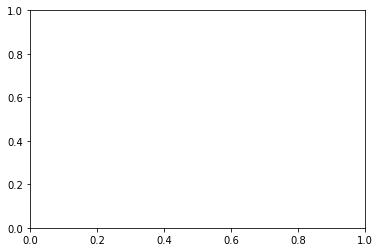

In [614]:
fig, ax = plt.subplots()

df9 = Social_Medium_Raw_ID.groupby(['Month of Year1', 'Source'])['Bounce Rate'] * Channel_Raw_ID.groupby(['Month of Year1', 'Saras  Channel Groupping'])['Sessions']
df10 = pd.DataFrame(df9, columns = ["Ecommerce Conversion Rate"]).reset_index().fillna(0)
# df10 = df10.groupby('Month of Year1')['Ecommerce Conversion Rate']

# df4_1.plot(kind='line', stacked=True, figsize=(12,6), color = "blue", ax = ax, use_index=True, secondary_y=True)
df10.groupby("Saras  Channel Groupping").plot(x="Month of Year1", y="Ecommerce Conversion Rate", ax=ax, figsize=(12,6),stacked=True,
                                             ylabel="Ecommerce Conversion Rate", xlabel="Month", title="Average Ecommerce Conversion Rate by Channel Group")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Group',bbox_to_anchor=(1.0, 1.0))

,One Time Sessions,Sessions,Bounce Rate
Source,,,
Facebook,1346403.0,1502508,0.896104
Tiktok,41258.0,46847,0.880697
facebook,1015659.0,1168222,0.869406
l.facebook.com,25667.0,32360,0.793171
tiktok.com,5934.0,8181,0.725339
TikTok,267142.0,388427,0.687753
youtube.com,557.0,847,0.657615
facebook.com,2529.0,4470,0.565772
whatsapp,253701.0,472217,0.537255


,One Time Sessions,Sessions,Bounce Rate
Source,,,
Facebook,2414748.0,2754138,0.876771
Tiktok,314334.0,443455,0.708830
youtube.com,557.0,847,0.657615
whatsapp,253701.0,472217,0.537255
t.co,85.0,181,0.469613
Instagram,22989.0,60760,0.378357
IGShopping,4941.0,14162,0.348891
